In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec


df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/Recommend Retail/online_retail_II.xlsx',dtype={'Customer ID ':str,'Invoice':str})

In [9]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [12]:
df['Customer ID'] = df['Customer ID'].astype('object')

In [17]:
df.groupby('Quantity').size()

Quantity
-9600     1
-9360     1
-9200     1
-9000     2
-8800     1
         ..
 10200    1
 12480    1
 12744    1
 12960    2
 19152    1
Length: 825, dtype: int64

In [18]:
df.describe().round(2)

,Quantity,Price
count,525461.00,525461.00
mean,10.34,4.69
std,107.42,146.13
min,-9600.00,-53594.36
25%,1.00,1.25
50%,3.00,2.10
75%,10.00,4.21
max,19152.00,25111.09


In [20]:
df.groupby('Customer ID').count().sort_values('Invoice',ascending=False).Invoice.head()

Customer ID
14911.0    5710
17841.0    5114
14606.0    3927
14156.0    2710
12748.0    2665
Name: Invoice, dtype: int64

In [23]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [25]:
df = df[df.Quantity > 0]
df.shape

(513135, 8)

In [27]:
df['Customer ID'] = df['Customer ID'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Invoice'] = df['Invoice'].astype(str)

In [29]:
df_invo1 = df.groupby('Invoice').count().Quantity.sort_values()
df_invo1

Invoice
C496350      1
522133       1
522134       1
498732       1
522139       1
          ... 
536876     593
537237     597
537638     601
538071     652
537434     675
Name: Quantity, Length: 22104, dtype: int64

In [30]:
frame = {'Invoice':df_invo1.index, 'Count':df_invo1.values}
res = pd.DataFrame(frame)
invoices_small = res[res.Count <=1].Invoice.tolist()
invoices_small[:10]

['C496350',
 '522133',
 '522134',
 '498732',
 '522139',
 '498727',
 '522171',
 '498747',
 '522207',
 '522287']

In [31]:
df = df[df.Invoice.apply(lambda x: x not in invoices_small)]

In [32]:
df.shape

(509886, 8)

In [33]:
customers = df.Invoice.unique().tolist()
print(len(customers))
customers[:6]

18855


['489434', '489435', '489436', '489437', '489438', '489439']

In [34]:
purchase_train = []
for i in tqdm(customers):
  temp = df[df.Invoice == i]['StockCode'].tolist()
  purchase_train.append(temp)

100%|██████████| 18855/18855 [16:36<00:00, 18.91it/s]


In [35]:
from IPython.display import clear_output

class MonitorCallbacks(CallbackAny2Vec):
  def __init__(self):
    self.epoch = 0
    clear_output(wait=True)
    print('Start...')

  def on_epoch_begin(self,model):
    pass

  def on_epoch_end(self,model):
    clear_output(wait=True)
    print('Epoch #{}/{}'.format(self.epoch+1, model.epochs))

monitor = MonitorCallbacks()
model = Word2Vec(purchase_train, vector_size=50, window=5, sg=1, workers=4, epochs=40, callbacks=[monitor])

Epoch #1/40


In [38]:
model.wv.index_to_key[:6]

['85123A', '22423', '85099B', '21212', '21232', '20725']

In [39]:
model.wv['22423']

array([-0.24184538, -0.2827403 , -0.2581021 , -0.3388287 ,  0.47203186,
        0.20312576,  0.18836933,  0.1845749 , -0.02043606, -0.23005064,
       -0.12823622, -0.1478208 , -0.20519258,  0.15171441, -0.02867787,
        0.38288134,  0.00797321, -0.25969434, -0.42141327, -0.5553839 ,
        0.1924982 , -0.18271253,  0.34911838,  0.49222276, -0.02473047,
       -0.20529325, -0.07676118, -0.2758288 , -0.8197538 , -0.04410598,
       -0.02012293, -0.10403099, -0.25166976, -0.12087402,  0.3573994 ,
       -0.1679527 ,  0.00250106, -0.12990649,  0.49236128, -0.05668664,
        0.16058339, -0.27018097, -0.24592005, -0.2108705 ,  0.5031788 ,
       -0.05760694, -0.15673225, -0.12997787,  0.3736076 ,  0.37238872],
      dtype=float32)

In [40]:
model.wv.most_similar('22613',topn=5)

[('21094', 0.6700912714004517),
 ('21080', 0.6594376564025879),
 ('21989', 0.6295967102050781),
 ('22907', 0.6280941963195801),
 ('21078', 0.6252267956733704)]

In [41]:
products = df[['StockCode','Description']]

products.drop_duplicates(inplace =True, subset='StockCode',keep='last')
products[:5]

<ipython-input-41-c4b2efcc13ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products.drop_duplicates(inplace =True, subset='StockCode',keep='last')


,StockCode,Description
440,35751C,PURPLE CURRENT CANDLE RING
1343,84648,NEW BAROQUE WALL MIRROR
1808,21767,FRENCH STYLE WIRE DOOR CABINET
1898,20739,*USB Office Glitter Lamp
2201,30086C,ASSORTED FRUIT STRAWS


In [42]:
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()
products_dict['22613']

['PACK OF 20 SPACEBOY NAPKINS']

In [45]:
sku_now = '22613'
similars = model.wv.most_similar(sku_now,topn=7)

print('Shopping:',sku_now,products_dict[sku_now][0])
print('-------------------------------------------------------------')
for i in similars:
  if i[1] > 0.6:
    print('{:6} {:36} {:.3f}'.format(i[0], products_dict[i[0]][0], i[1]))

Shopping: 22613 PACK OF 20 SPACEBOY NAPKINS
-------------------------------------------------------------
21094  SET/6 RED SPOTTY PAPER PLATES        0.670
21080  SET/20 RED RETROSPOT PAPER NAPKINS   0.659
21989  PACK OF 20 SKULL PAPER NAPKINS       0.630
22907  PACK OF 20 NAPKINS PANTRY DESIGN     0.628
21078  SET/20 STRAWBERRY PAPER NAPKINS      0.625
22635  CHILDS BREAKFAST SET DOLLY GIRL      0.623
21987  PACK OF 6 SKULL PAPER CUPS           0.611


In [47]:
vectors = np.asarray(model.wv.vectors)
vectors.shape

(3773, 50)

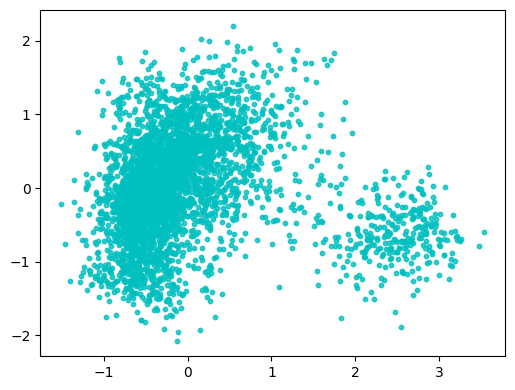

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)
plt.figure(figsize=(6,4.5))
plt.scatter(result[:,0],result[:,1],s=10,alpha=.8,c='c')
plt.show()

In [26]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [50]:
model.save('amazon_store.model')

In [52]:
import pickle

pickle.dump(model,open('recommend_model.p','wb'))

**Create Database**

In [ ]:
new_data = [{'Names':'Alex','Customer ID':'13085.0'},
             {'Names':'Alexandra Daddario','Customer ID':'14911.0'},
             {'Names':'Chris Evan','Customer ID':'17841.0'},
             {'Names':'Dwayne Johnson','Customer ID':'14606.0'},
             {'Names':'Emma Clark','Customer ID':'14156.0'},
             {'Names':'Emma Watson','Customer ID':'12748.0'},
             {'Names':'Emma_stone','Customer ID':'17850.0'},
             {'Names':'Gal Goldot','Customer ID':'16549.0'},
             {'Names':'Jony Depp','Customer ID':'15311.0'},
             {'Names':'Leonado Dicapiro','Customer ID':'14527.0'},
             {'Names':'Margot Robbie','Customer ID':'14646.0'},
             {'Names':'Mark Buffalo','Customer ID':'16782.0 '},
             {'Names':'Nartalee Portman','Customer ID':'13089.0'},
             {'Names':'Taylor Swift','Customer ID':'15005.0'},
             {'Names':'Tom Cruise','Customer ID':'17377.0'},
             {'Names':'Tom Holland','Customer ID':'13081.0'},]

In [ ]:
new_df = pd.DataFrame(new_data)

In [ ]:
pickle.dump(new_df,open('Database.pkl','wb'))